#### AUTO MPG Dataset
This lab uses the classic Auto MPG Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll examine the relation between fuel efficiency and different attributes like: cylinders, displacement, horsepower, and weight.

The dataset is available from the UCI Machine Learning Repository. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.(Quinlan, 1993)

Activities
Let's import the dataset auto-mpg.csv and explote it. Check the structure of the data by inspecting the number of rows, columns, and attributes of the dataset. You can use functions like .shape, .head(), .info(), and .describe() to get a quick overview of the data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: >

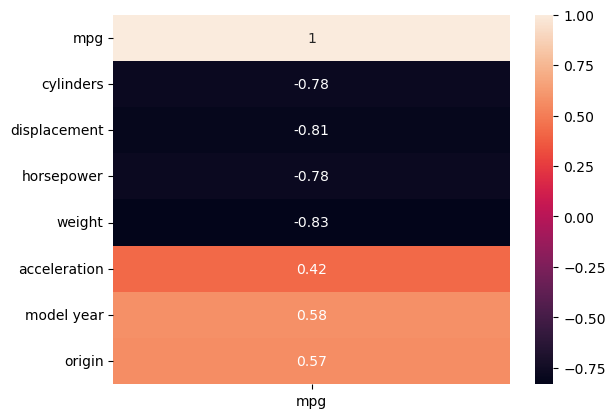

In [5]:
df = df.drop(['car name'], axis = 1)
df = df.drop(df[df['horsepower'] == '?'].index, axis=0)
corr=df.corr()
x = corr[['mpg']]
sns.heatmap(x, annot=True)

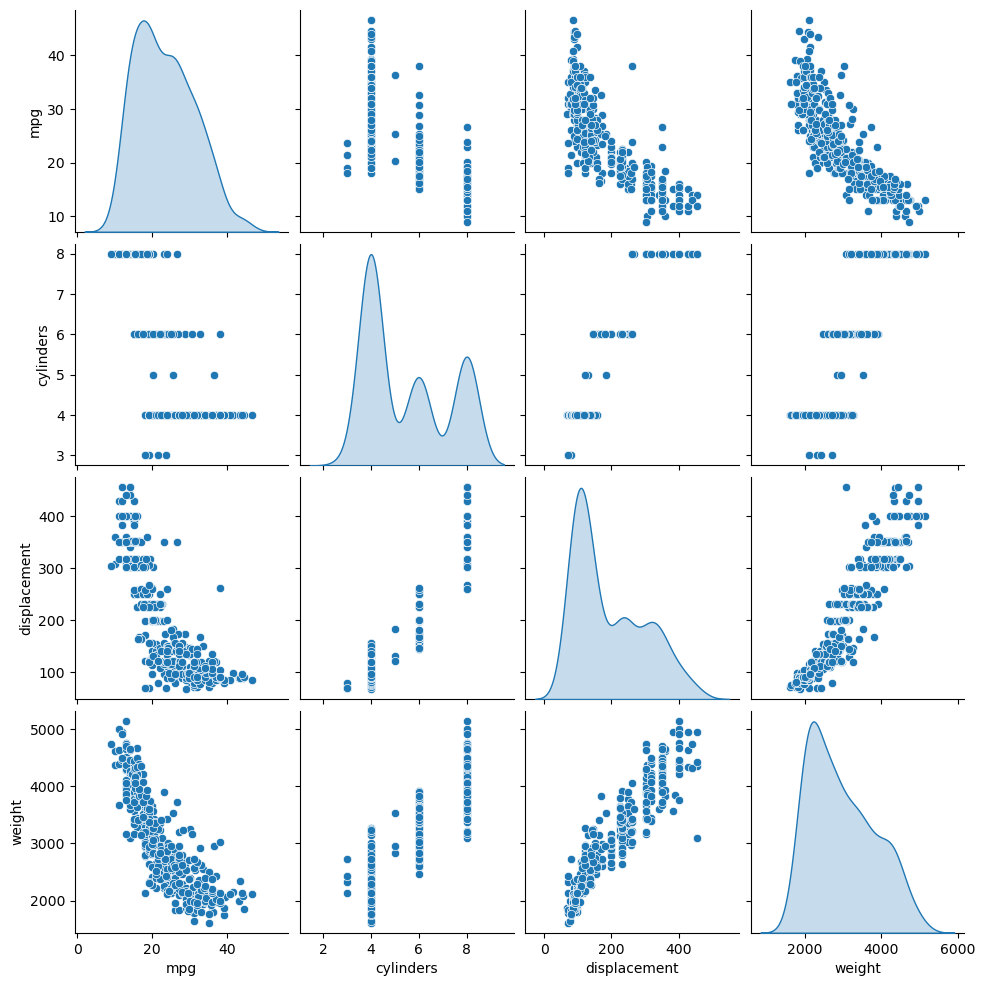

In [6]:
sns.pairplot(df[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

In [7]:
X=df[[ "cylinders", "displacement", "weight"]]
y=df.mpg

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [9]:
X_train=X_train[[ "cylinders", "displacement", "weight"]]
X_test=X_test[[ "cylinders", "displacement", "weight"]]

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


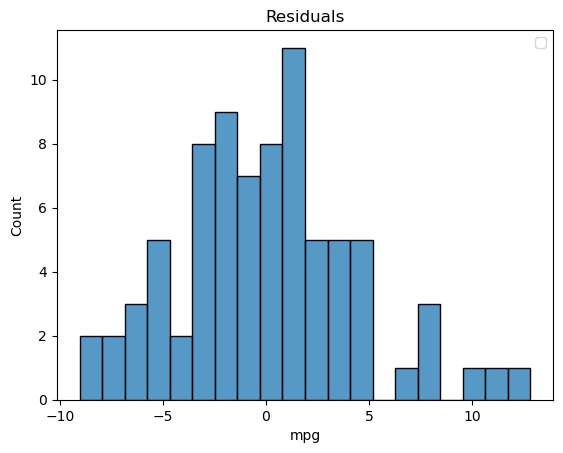

In [13]:
sns.histplot(y_test - y_pred, bins = 20)
plt.legend()
plt.title("Residuals")
plt.show()